In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import anndata
import h5py
import matplotlib.pyplot as plt
# import os
# import seaborn as sns
# import scanpy as sc
import pandas as pd
# import torch

# from scbasset.scbasset_utils import motif_score
from scbasset.utils import *
# from scbasset.model_class import ModelClass
# from scbasset.config import Config

In [45]:
start_directory = '../../../'
# start_directory = ''

seq_len = 768
type_data = 'TF_to_region'
# file_name = 'TF_to_region_hvg'
# file_name = 'TF_to_region_hvg_3k_min1'

# file_name = 'TF_to_region_marker_genes'
file_name = 'TF_to_region_ctx'
# file_name = 'TF_to_region_scplus'

data_path = start_directory + 'data/' + type_data + '/processed/'

ad_file = data_path + file_name + '-' + str(seq_len) + '-ad.h5ad'
h5_file = data_path + file_name + '-' + str(seq_len) + '-train_val_test.h5'

In [46]:
# f = h5py.File(h5_file, 'r')
# X = f['X'][:].astype('float32')
# Y = f['Y'][:].astype('float32')

# n_TFs = Y.shape[1]
# ic(n_TFs, Y.shape[0])

### Region representation

In [47]:
# read h5ad file
ad = anndata.read_h5ad(ad_file)
ad

AnnData object with n_obs × n_vars = 1001 × 66271
    obs: 'TF', 'n_genes'
    var: 'chr', 'start', 'end', 'n_cells'

In [48]:
pd.DataFrame(ad.obs.value_counts('TF').value_counts()).sum()

0    1001
dtype: int64

In [49]:
ad_regions = ad.T
ad_regions = prepare_leiden_representation(adata=ad_regions, resolution=1)

  0%|                                                            | 0/3 [00:00<?, ?function/s]

         Falling back to preprocessing with `sc.pp.pca` and default params.


100%|████████████████████████████████████████████████████| 3/3 [01:40<00:00, 33.49s/function]


In [50]:
ad_regions.var_names

Index(['AHDC1', 'ALX1', 'AR', 'ARGFX', 'ARID5A', 'ARID5B', 'ARNT2',
       'ATF7-NPFF', 'BARX2', 'BCL11B',
       ...
       'ZNF879', 'ZNF90', 'ZNF93', 'ZNF98', 'ZNF99', 'ZSCAN10', 'ZSCAN16',
       'ZSCAN31', 'ZSCAN5C', 'ZXDC'],
      dtype='object', length=1001)

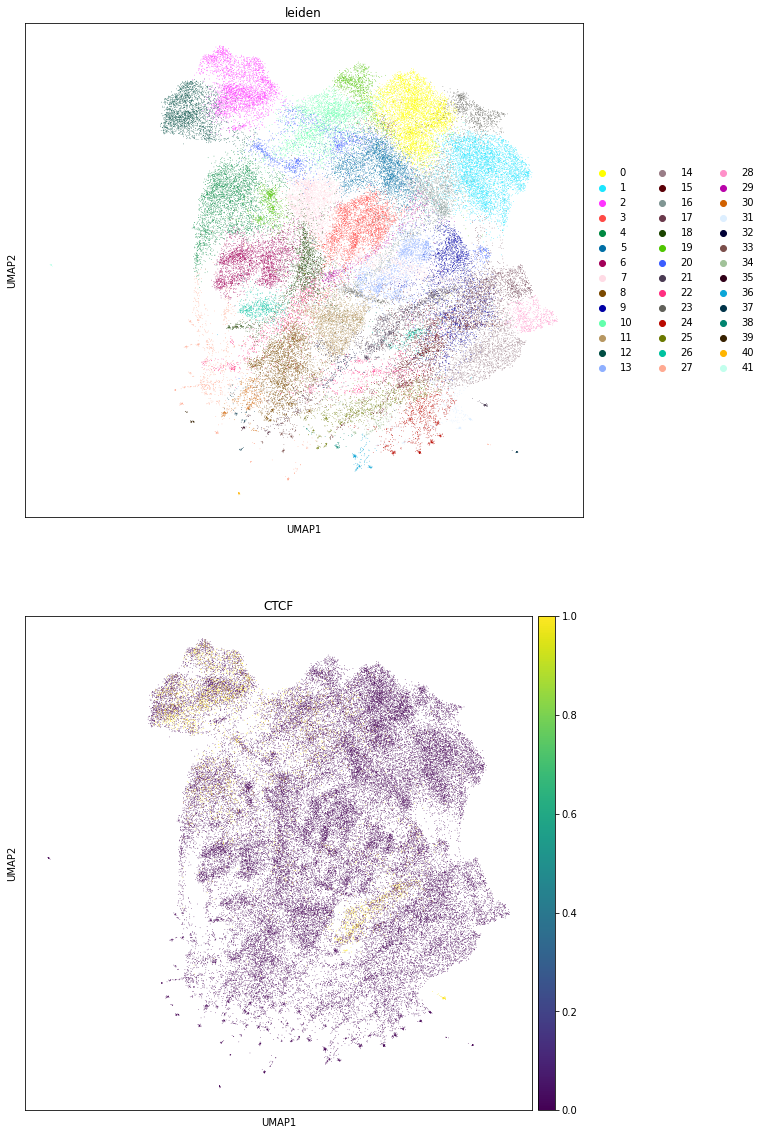

In [51]:
f, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 20))
sc.pl.umap(ad_regions, color='leiden', ax=axs[0], show=False)
sc.pl.umap(ad_regions, color='CTCF', ax=axs[1])

In [52]:
ad_regions.obs

,chr,start,end,n_cells,leiden
chr9:3809670-3810170,chr9,3809670,3810170,118,12
chr2:112624361-112624861,chr2,112624361,112624861,109,4
chr9:105062377-105062877,chr9,105062377,105062877,186,2
chr1:77388625-77389125,chr1,77388625,77389125,79,16
chr10:7412305-7412805,chr10,7412305,7412805,28,7
...,...,...,...,...,...
chr7:69654251-69654751,chr7,69654251,69654751,8,25
chr10:58331569-58332069,chr10,58331569,58332069,49,1
chr17:39706975-39707475,chr17,39706975,39707475,7,25
chr4:105170663-105171163,chr4,105170663,105171163,78,23


### TF representation

In [53]:
ad_TF = ad

# sc.pp.neighbors(ad_TF, use_rep='projection')
ad_TF = prepare_leiden_representation(ad_TF)
ad_TF

  0%|                                                            | 0/3 [00:00<?, ?function/s]

         Falling back to preprocessing with `sc.pp.pca` and default params.


100%|████████████████████████████████████████████████████| 3/3 [00:06<00:00,  2.07s/function]


AnnData object with n_obs × n_vars = 1001 × 66271
    obs: 'TF', 'n_genes', 'leiden'
    var: 'chr', 'start', 'end', 'n_cells'
    uns: 'neighbors', 'umap', 'leiden'
    obsm: 'X_pca', 'X_umap'
    obsp: 'distances', 'connectivities'

In [54]:
ad_TF.obs

,TF,n_genes,leiden
AHDC1,AHDC1,8313,15
ALX1,ALX1,1362,4
AR,AR,8603,15
ARGFX,ARGFX,116,3
ARID5A,ARID5A,143,8
...,...,...,...
ZSCAN10,ZSCAN10,1374,0
ZSCAN16,ZSCAN16,320,3
ZSCAN31,ZSCAN31,65,3
ZSCAN5C,ZSCAN5C,513,10


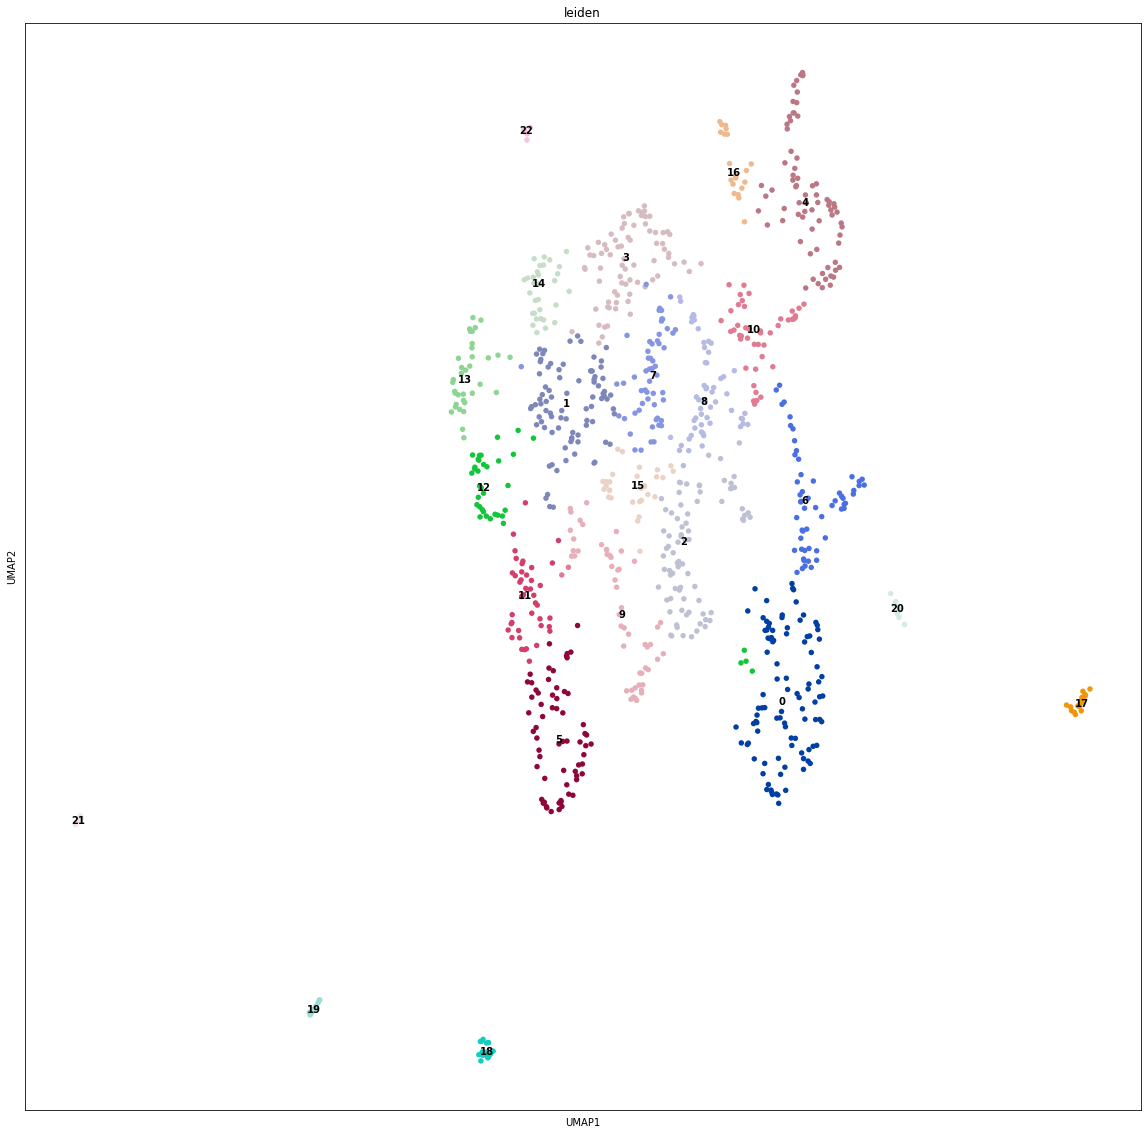

In [55]:
f, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
# sc.pl.umap(ad_TF, color='leiden', ax=axs[0], show=False)
sc.pl.umap(ad_TF, color='leiden', legend_loc='on data', ax=axs)

#### TF occurance

In [56]:
ad.var.n_cells.value_counts()

1      948
2      794
3      718
5      684
4      672
      ... 
318      1
354      1
313      1
323      1
333      1
Name: n_cells, Length: 349, dtype: int64

In [57]:
ad.obs.n_genes.value_counts()

101      4
145      4
5392     4
713      3
222      3
        ..
27204    1
5005     1
704      1
13907    1
5955     1
Name: n_genes, Length: 876, dtype: int64

In [58]:
pd.DataFrame(ad.obs.value_counts('TF').value_counts())

,0
1,1001
